# Flight Risk Assessment

## 1. Overview


Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


## 2. Problem

Assess the risk involved in purchase and acquisition of aircraft and advise on the safest options to move forward with.

### Data Analysis Goals

-There are certain pieces of information in the dataet that can clarify the risk levels of each make & model of plane.

-The relevant information is:
* Incident Frequency: Number of separate incidents per aircraft.
* Incident Severity: Number if injured passengers and/or fatalities.
* Aircraft Damage: Amount of damage to the aircraft (minor, substantial, destroyed).
* Phase of Flight: Points during travel that the incidents took place.
* Weather Conditions: Type of weather during the incident.

  

### Data Understanding

In this project, we will be working with a [Kaggle dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) from the National Transportation Safety Board that contains aircraft accident data from 1962 to 2023 in the United States and international waters.

## 3. Reading the Data

In [2]:
#import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data into a dataframe
pd.set_option('display.max_columns', None)
df = pd.read_csv('AviationData.csv', encoding= 'latin1', low_memory = False)

#preview top 5 records of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The size of the dataset presents a fairly large amount of irrelevant data to the goal of this project. As such, I found it dvisable to make a new dataframe and keep it to strictly the pertinent columns .

In [10]:
relevant_columns = ['Event.Id', 'Event.Date', 'Location','Investigation.Type', 'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',  'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured','Weather.Condition', 'Broad.phase.of.flight']
AD = df[relevant_columns]

In [11]:
AD.loc[:, 'Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

In [12]:
AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88856 non-null  object 
 2   Location                88837 non-null  object 
 3   Investigation.Type      88889 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Total.Fatal.Injuries    77488 non-null  float64
 9   Total.Serious.Injuries  76379 non-null  float64
 10  Total.Minor.Injuries    76956 non-null  float64
 11  Total.Uninjured         82977 non-null  float64
 12  Weather.Condition       84397 non-null  object 
 13  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(4), object(10)
memory usage

In [15]:
AD = AD.drop_duplicates()
AD.shape

(88889, 14)

In [16]:
AD.isna().sum()

Event.Id                      0
Event.Date                   33
Location                     52
Investigation.Type            0
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
dtype: int64

## 4. Data Cleaning

### 1. Identify the distribution of incidents per aircraft make and model.

To determine the risk factor involved, we need to first identify the frequency of incidents per make and model

The Make and Model columns contain missing values making up 0.07% and 0.1% of the data respectively. Seeing as this is a negligible amount, I have chosen to drop the rows with misssing values as that will not affect the data significantly.

In [28]:
AD_cleaned = AD.dropna(subset = ['Make', 'Model'])
AD_cleaned.shape

(88777, 14)

Let's check the distribution of data i.e., unique make and frequency of each.

In [29]:
make_counts = AD_cleaned['Make'].value_counts()
make_counts

Make
Cessna           22226
Piper            12029
CESSNA            4919
Beech             4330
PIPER             2840
                 ...  
Conrad Menzel        1
Blucher              1
Gideon               1
Brault               1
ROYSE RALPH L        1
Name: count, Length: 8224, dtype: int64

Now, we need to stream lie the different pieces of data that are from the same makes & models but contain entry errors eg capitalization, leading & trailing spaces etc.

In [30]:
AD_cleaned.loc[:, 'Make'] = AD_cleaned['Make'].str.capitalize()

 
AD_cleaned.loc[:, 'Make'] = AD_cleaned['Make'].str.strip()

In [31]:
AD_cleaned.loc[:, 'Make'] = AD_cleaned['Make'].str.replace(r'(Hawker\s*beech|Hawker|Beech|Hawker beachcraftcraft)', 'Hawker beechcraft', regex=True)

The make column seems to contain more unique categories than are useful in plotting a good visualization, therefore, I found it advisable to plot a sample of the whole rather than including everything.

In [32]:
AD_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 88888
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88777 non-null  object 
 1   Event.Date              88744 non-null  object 
 2   Location                88725 non-null  object 
 3   Investigation.Type      88777 non-null  object 
 4   Injury.Severity         87798 non-null  object 
 5   Aircraft.damage         85605 non-null  object 
 6   Make                    88777 non-null  object 
 7   Model                   88777 non-null  object 
 8   Total.Fatal.Injuries    77391 non-null  float64
 9   Total.Serious.Injuries  76287 non-null  float64
 10  Total.Minor.Injuries    76863 non-null  float64
 11  Total.Uninjured         82880 non-null  float64
 12  Weather.Condition       84338 non-null  object 
 13  Broad.phase.of.flight   61683 non-null  object 
dtypes: float64(4), object(10)
memory usage: 10.

In [34]:
make_counts = AD_cleaned['Make'].value_counts()

In [35]:
low_make_counts = make_counts.tail(20)
low_make_counts

Make
Pank                        1
Mckean                      1
S. piccolotto/dave morss    1
Lewis-pexton                1
Denzer                      1
Aune                        1
Seattle aerotech            1
Fay                         1
Lonnie w. ratliff           1
Bumgarner                   1
Lidster                     1
Murawski                    1
Wsk pzl swidnik             1
Castle                      1
Quinn                       1
Meeuwsen gordon             1
Hulle                       1
Dorfman,william a.          1
Firm                        1
Royse ralph l               1
Name: count, dtype: int64

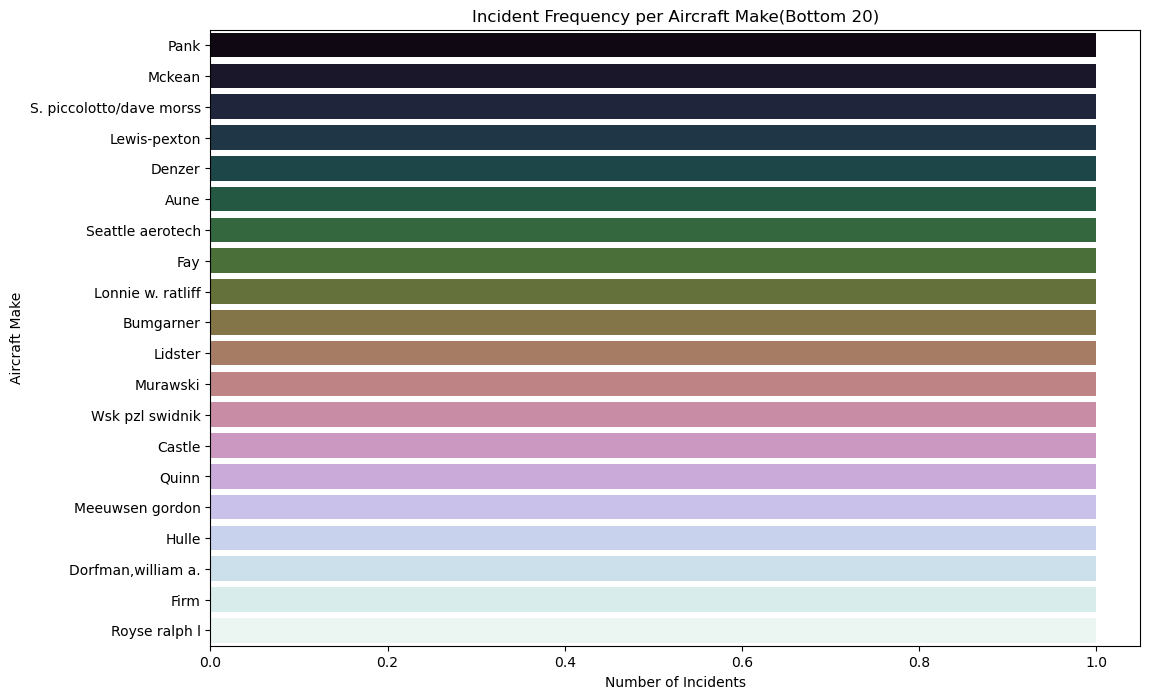

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x=low_make_counts.values, y=low_make_counts.index, palette='cubehelix')
plt.title('Incident Frequency per Aircraft Make(Bottom 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Make');

Each of the bottom 20 makes has only had one incident. That is not a lot to go on so we will look at the models as well for more conext.

The Model column has it's values in uppercase. To ensure this is true across the entire column, a little further cleaning is needed.

In [39]:
AD_cleaned.loc[:, 'Model'] = AD_cleaned['Model'].str.upper()

In [40]:
model_counts = AD_cleaned['Model'].value_counts() 
low_20_models = model_counts.tail(20)

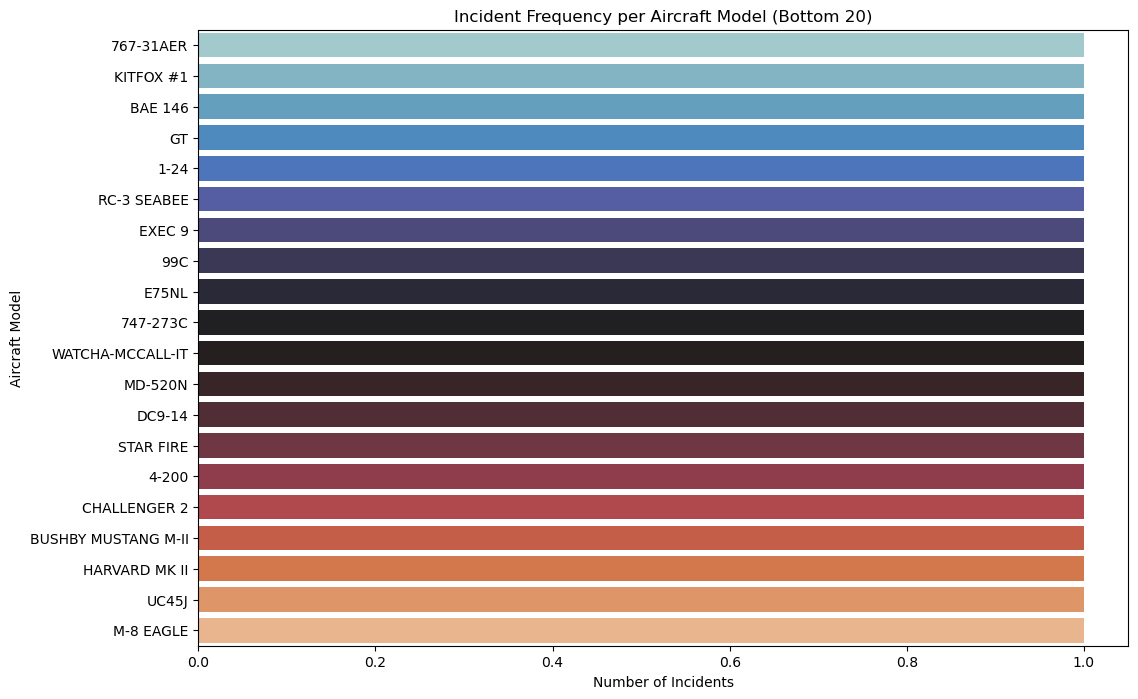

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x=low_20_models.values, y=low_20_models.index, palette='icefire')
plt.title('Incident Frequency per Aircraft Model (Bottom 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Model');

We are in the same situation as with the make column. We cannot infer much from this visual as there is little variation in the frequency of the incidents.

We can combine these  with other factors to draw clearer conclusions.

In [45]:
incident_counts = AD_cleaned.groupby(['Make', 'Model']).size().reset_index(name='Incident.Count')

# Display the top 10 aircraft with the highest incident count
print(incident_counts.sort_values(by='Incident.Count', ascending=False).head(20))


                    Make      Model  Incident.Count
4038              Cessna        152            2366
4062              Cessna        172            1753
4113              Cessna       172N            1163
13396              Piper  PA-28-140             932
4011              Cessna        150             829
4111              Cessna       172M             798
4116              Cessna       172P             689
4170              Cessna        182             659
4146              Cessna        180             621
4037              Cessna       150M             585
13288              Piper      PA-18             578
13406              Piper  PA-28-180             572
13297              Piper  PA-18-150             571
13405              Piper  PA-28-161             565
13413              Piper  PA-28-181             529
1961                Bell       206B             516
2597              Boeing        737             489
13553              Piper  PA-38-112             468
4036        

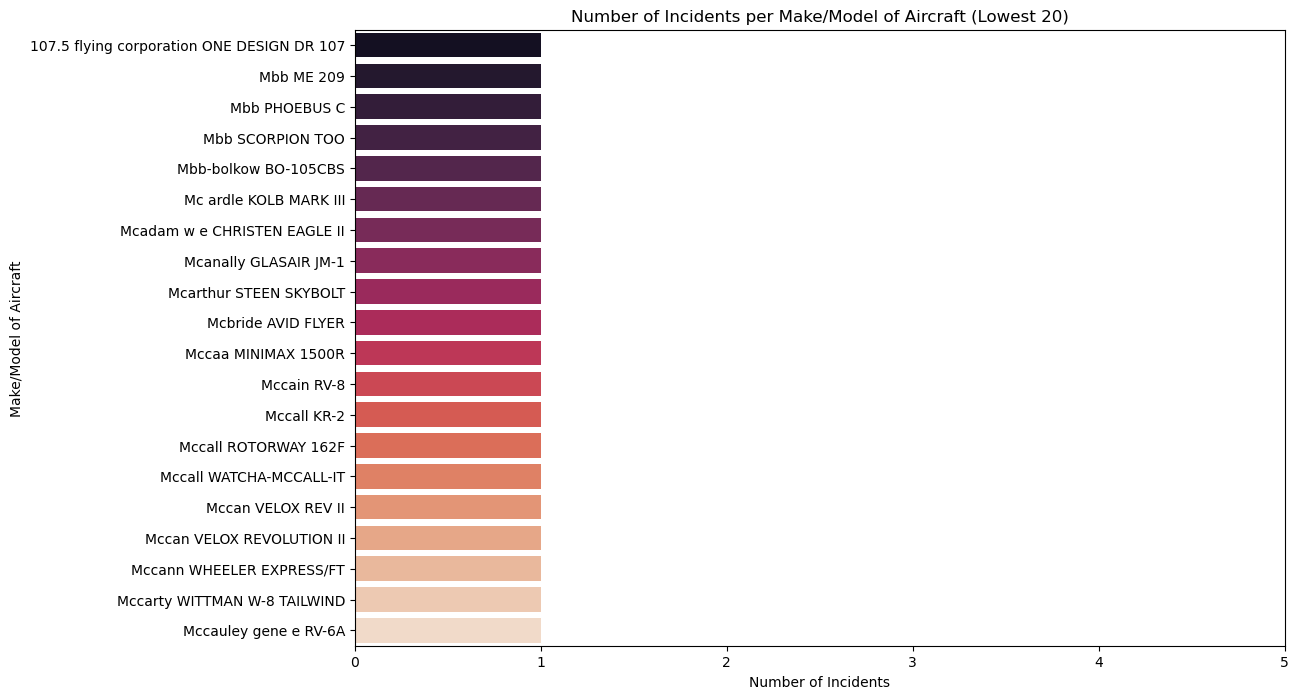

In [46]:
lowest_20_incidents = incident_counts.sort_values(by='Incident.Count').head(20)


lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']

plt.figure(figsize=(12, 8))
sns.barplot(x='Incident.Count', y='Make/Model', data=lowest_20_incidents, palette='rocket')
plt.title('Number of Incidents per Make/Model of Aircraft (Lowest 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Make/Model of Aircraft')
plt.xlim(0, 5);


From the frequency of incidents, there are too many options to provide a clear frontrunner in aircraft safety.

### 2. Identify the severity of injuries per aircraft make and model.

There are 109 unique entries in the 'Injury Severity' column, represented by varations of 'Fatal', differentiated by the number of fatalities.

These need to be streamlined. Missing values will need to be preserved, so they will be categorized separately.

In [47]:
AD_cleaned['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

In [ ]:
AD_cleaned['Injury.Severity'].unique()

In [49]:
AD_cleaned.head()

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24 00:00:00,"MOOSE CREEK, ID",Accident,Fatal(2),Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19 00:00:00,"BRIDGEPORT, CA",Accident,Fatal(4),Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30 00:00:00,"Saltville, VA",Accident,Fatal(3),Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19 00:00:00,"EUREKA, CA",Accident,Fatal(2),Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02 00:00:00,"Canton, OH",Accident,Fatal(1),Destroyed,Cessna,501,1.0,2.0,NaN,0.0,VMC,Approach


In [53]:
AD_cleaned_copy = AD_cleaned.copy()
AD_cleaned_copy['Injury.Severity'] = np.where(AD_cleaned_copy['Injury.Severity'].str.contains('Fatal', na = False), 'Fatal' , AD_cleaned_copy['Injury.Severity']) 


In [54]:
AD_cleaned_copy['Injury.Severity'] = AD_cleaned_copy['Injury.Severity'].fillna('Unknown')
AD_cleaned_copy.head()

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24 00:00:00,"MOOSE CREEK, ID",Accident,Fatal,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19 00:00:00,"BRIDGEPORT, CA",Accident,Fatal,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30 00:00:00,"Saltville, VA",Accident,Fatal,Destroyed,Cessna,172M,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19 00:00:00,"EUREKA, CA",Accident,Fatal,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02 00:00:00,"Canton, OH",Accident,Fatal,Destroyed,Cessna,501,1.0,2.0,NaN,0.0,VMC,Approach


In [56]:
AD_cleaned_copy.isnull().sum()

Event.Id                      0
Event.Date                   33
Location                     52
Investigation.Type            0
Injury.Severity               0
Aircraft.damage            3172
Make                          0
Model                         0
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
dtype: int64

In [58]:
AD_cleaned_copy['Injury.Severity'].value_counts()

Injury.Severity
Fatal          85098
Incident        2214
Unknown          979
Minor            218
Serious          173
Unavailable       95
Name: count, dtype: int64

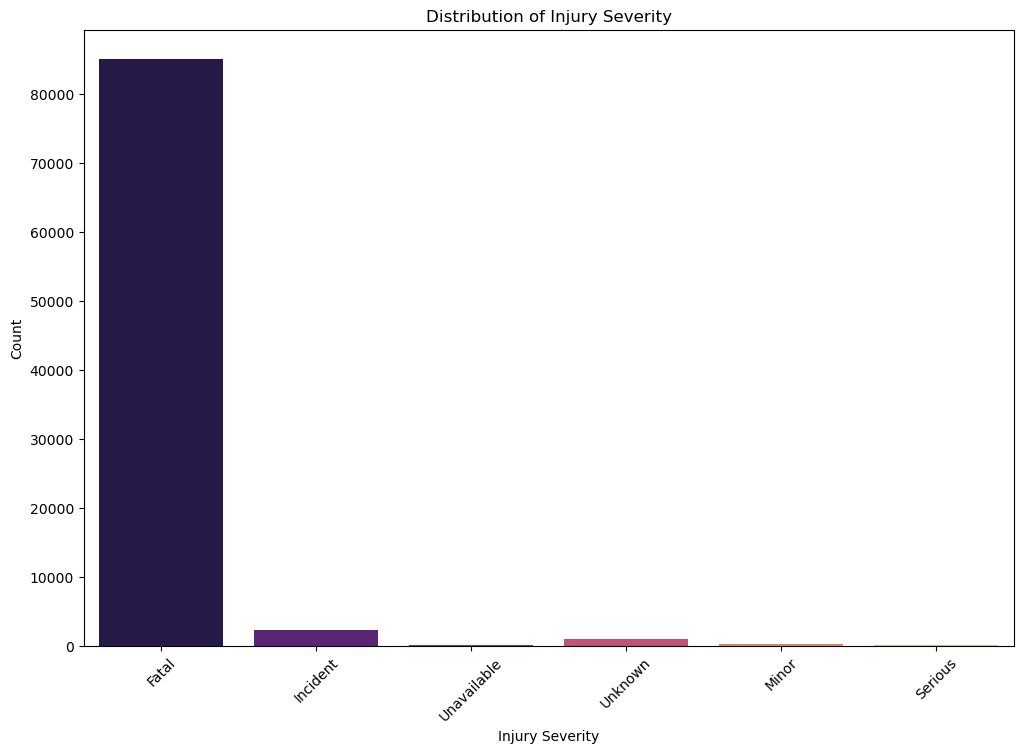

In [60]:
plt.figure(figsize=(12, 8))
sns.countplot(data=AD_cleaned_copy, x='Injury.Severity', palette='magma')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=45);

This graph displays that by far plane accidents are more fatal than not. 
Now to assess the risk further, we can look at the distribution of fatalities per make and model.

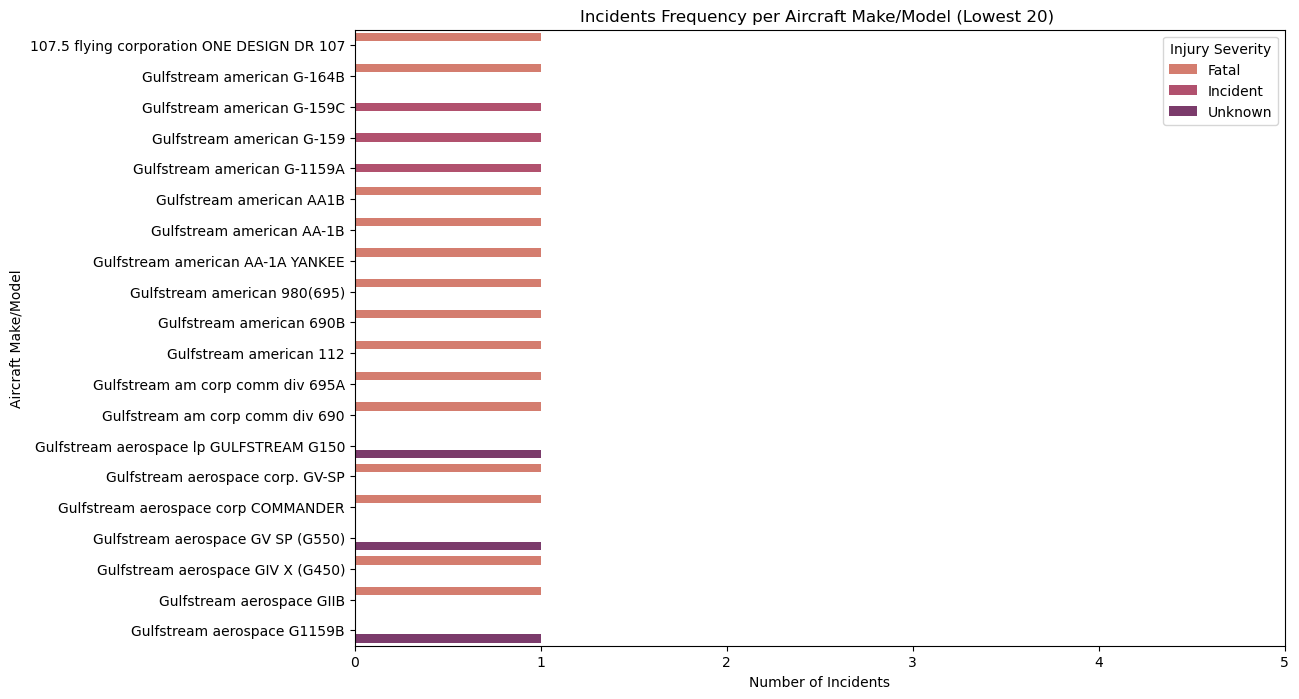

In [61]:
plt.figure(figsize=(12,8))

merged_df = pd.merge(incident_counts, AD_cleaned_copy, on=['Make', 'Model'])


lowest_20_incidents = merged_df.sort_values(by='Incident.Count').head(20)


lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']


sns.barplot(x='Incident.Count', y='Make/Model',hue='Injury.Severity', data=lowest_20_incidents, palette='flare');
plt.title('Incidents Frequency per Aircraft Make/Model (Lowest 20) ')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Make/Model')
plt.legend(title='Injury Severity');
plt.xlim(0, 5);

We still have a large portion of the dataset having a frequency of 1. Thi still doesn't offer any clear inferences.

### 3. Identify damage distibution per aircraft make and model.

In [63]:
AD_cleaned_copy3 = AD_cleaned_copy.copy()

AD_cleaned_copy3['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [65]:
AD_cleaned_copy3['Aircraft.damage'] = AD_cleaned_copy3['Aircraft.damage'].fillna('Missing')

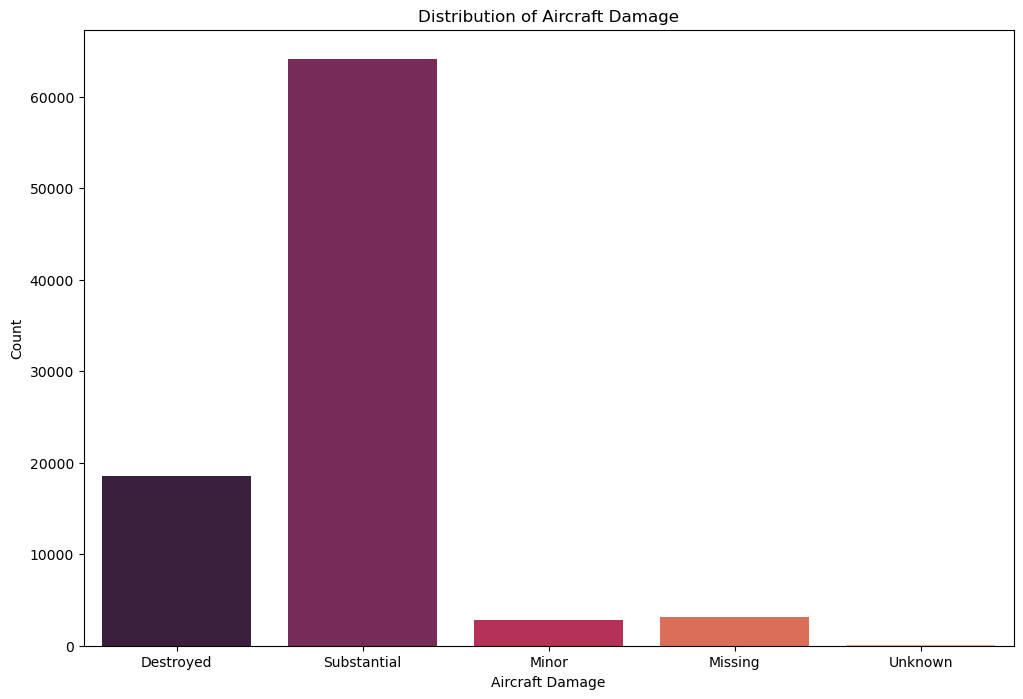

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(data=AD_cleaned_copy3, x='Aircraft.damage', palette='rocket')
plt.title('Distribution of Aircraft Damage')
plt.xlabel('Aircraft Damage')
plt.ylabel('Count');


Most planes wind up with substantial damage.

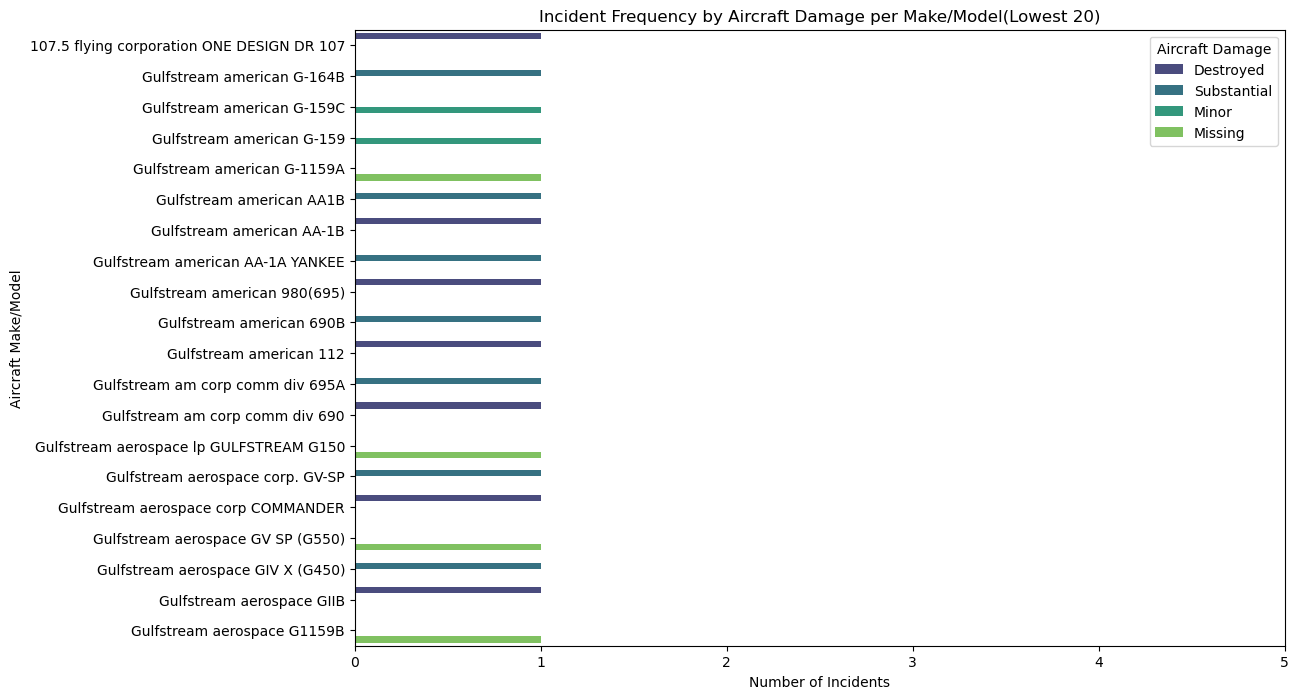

In [67]:
plt.figure(figsize=(12,8))

merged_damage = pd.merge(incident_counts, AD_cleaned_copy3, on=['Make', 'Model'])

lowest_20_incidents = merged_damage.sort_values(by='Incident.Count').head(20)

lowest_20_incidents['Make/Model'] = lowest_20_incidents['Make'] + ' ' + lowest_20_incidents['Model']


sns.barplot(x='Incident.Count', y='Make/Model',hue='Aircraft.damage', data=lowest_20_incidents, palette='viridis');
plt.title('Incident Frequency by Aircraft Damage per Make/Model(Lowest 20)')
plt.xlabel('Number of Incidents')
plt.ylabel('Aircraft Make/Model')
plt.legend(title='Aircraft Damage');
plt.xlim(0, 5);

### 4. Identify a risk rating for the aircraft.

The European Aviation Safety Agency (EASA) developed the European Risk Classification Scheme (ERCS) framework, to assign a risk score to all reported occurrences. This framework calculates risk  by taking in two variables: Severity and Likelihood of Occurrence(how often similar incidents occur). 
To get the likelihood of occurrence, we count the number of incidents for each 'Make' and 'Model' combination. More frequent incidents imply higher likelihood.

In [75]:
AD_cleaned_copy5 = AD_cleaned_copy4.copy()

fill_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
AD_cleaned_copy5[fill_columns] = AD_cleaned_copy5[fill_columns].fillna(0)


In [77]:
def calculate_risk_score(row):
    total_people = (row['Total.Fatal.Injuries'] + 
                    row['Total.Serious.Injuries'] + 
                    row['Total.Minor.Injuries'] + 
                    row['Total.Uninjured'])
    
    if total_people == 0:
        return 0  
    
   
    weighted_injuries = (row['Total.Fatal.Injuries'] * 10 + 
                         row['Total.Serious.Injuries'] * 5 + 
                         row['Total.Minor.Injuries'] * 1 +
                         row['Total.Uninjured'] * 0.5
                        )
    
    
    severity_score = weighted_injuries / total_people
    
    return severity_score

AD_cleaned_copy5['Severity.Score'] = AD_cleaned_copy5.apply(calculate_risk_score, axis=1)

In [79]:
AD_cleaned_copy5 = AD_cleaned_copy5.merge(incident_counts, on=['Make', 'Model'])


AD_cleaned_copy5['Likelihood.Score'] = pd.cut(AD_cleaned_copy5['Incident.Count'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)


In [81]:
AD_cleaned_copy5['ERCS.Score'] = AD_cleaned_copy5['Severity.Score'] * AD_cleaned_copy5['Likelihood.Score']
AD_cleaned_copy5.tail()

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity.Score,Incident.Count,Likelihood.Score,ERCS.Score
88772,20221227106491,2022-12-26 00:00:00,"Annapolis, MD",Accident,Minor,Missing,Piper,PA-28-151,0.0,1.0,0.0,0.0,NaN,Missing,5.00,177,1,5.00
88773,20221227106494,2022-12-26 00:00:00,"Hampton, NH",Accident,Unknown,Missing,Bellanca,7ECA,0.0,0.0,0.0,0.0,NaN,Missing,0.00,122,1,0.00
88774,20221227106497,2022-12-26 00:00:00,"Payson, AZ",Accident,Fatal,Substantial,American champion aircraft,8GCBC,0.0,0.0,0.0,1.0,VMC,Missing,0.50,14,1,0.50
88775,20221227106498,2022-12-26 00:00:00,"Morgan, UT",Accident,Unknown,Missing,Cessna,210N,0.0,0.0,0.0,0.0,NaN,Missing,0.00,56,1,0.00
88776,20221230106513,2022-12-29 00:00:00,"Athens, GA",Accident,Minor,Missing,Piper,PA-24-260,0.0,1.0,0.0,1.0,NaN,Missing,2.75,118,1,2.75


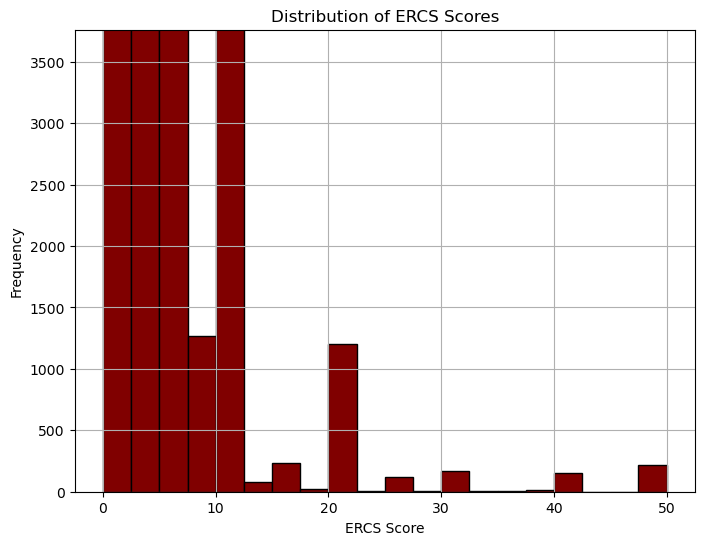

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(AD_cleaned_copy5['ERCS.Score'], bins=20, color='maroon', edgecolor='black')
plt.title('Distribution of ERCS Scores')
plt.xlabel('ERCS Score')
plt.ylabel('Frequency')
plt.ylim(0, 3760)
plt.grid(True);

Most planes appear to have an ECRS score of 10 or lower, making them prferable acquisitions.

# 5. Exploratory Data Analysis

It is clearer to group the data by ECRS into 'Low', 'Medium' & 'High'.

In [86]:

low_threshold = 10
high_threshold = 30


def categorize_ercs(score):
    if score < low_threshold:
        return 'Low Risk'
    elif score < high_threshold:
        return 'Medium Risk'
    else:
        return 'High Risk'


AD_cleaned_copy5['Risk.Category'] = AD_cleaned_copy5['ERCS.Score'].apply(categorize_ercs)
AD_cleaned_copy5.head()

,Event.Id,Event.Date,Location,Investigation.Type,Injury.Severity,Aircraft.damage,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Severity.Score,Incident.Count,Likelihood.Score,ERCS.Score,Risk.Category
0,20001218X45444,1948-10-24 00:00:00,"MOOSE CREEK, ID",Accident,Fatal,Destroyed,Stinson,108-3,2.0,0.0,0.0,0.0,UNK,Cruise,10.000000,98,1,10.000000,Medium Risk
1,20001218X45447,1962-07-19 00:00:00,"BRIDGEPORT, CA",Accident,Fatal,Destroyed,Piper,PA24-180,4.0,0.0,0.0,0.0,UNK,Unknown,10.000000,4,1,10.000000,Medium Risk
2,20061025X01555,1974-08-30 00:00:00,"Saltville, VA",Accident,Fatal,Destroyed,Cessna,172M,3.0,0.0,0.0,0.0,IMC,Cruise,10.000000,798,2,20.000000,Medium Risk
3,20001218X45448,1977-06-19 00:00:00,"EUREKA, CA",Accident,Fatal,Destroyed,Rockwell,112,2.0,0.0,0.0,0.0,IMC,Cruise,10.000000,9,1,10.000000,Medium Risk
4,20041105X01764,1979-08-02 00:00:00,"Canton, OH",Accident,Fatal,Destroyed,Cessna,501,1.0,2.0,0.0,0.0,VMC,Approach,6.666667,31,1,6.666667,Low Risk


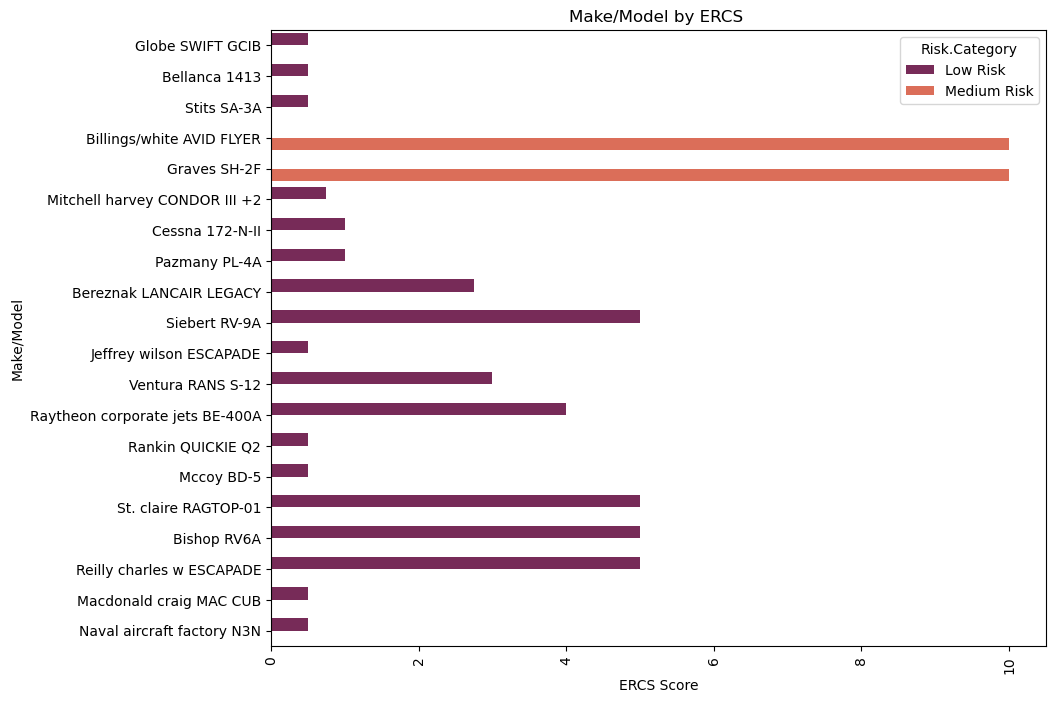

In [88]:
plt.figure(figsize = (10,8))

low_20_ercs = AD_cleaned_copy5.sort_values(by='Incident.Count').head(20)
low_20_ercs['Make/Model'] = low_20_ercs['Make'] + ' ' + low_20_ercs['Model']


sns.barplot(x = 'ERCS.Score', y='Make/Model',  hue = 'Risk.Category', data = low_20_ercs, palette ='rocket', orient='h')
plt.title('Make/Model by ERCS ')
plt.ylabel('Make/Model')
plt.xlabel('ERCS Score')

plt.xticks(rotation=90);

This paints a much clearer picture on which aircraft present the least risk.

There are still some points in the plot(1278) that have an ECRS score of 0. That is 1.44% of the set. These are to be dropped.

In [90]:
mask = ((AD_cleaned_copy5['Total.Fatal.Injuries'] == 0) &
        (AD_cleaned_copy5['Total.Serious.Injuries'] == 0) &
        (AD_cleaned_copy5['Total.Minor.Injuries'] == 0) &
        (AD_cleaned_copy5['Total.Uninjured'] == 0))


AD_filtered = AD_cleaned_copy5[~mask]



AD_filtered.to_csv('filtered_aviation_data.csv', index=False)

In [92]:
AD_filtered.shape

(87498, 19)

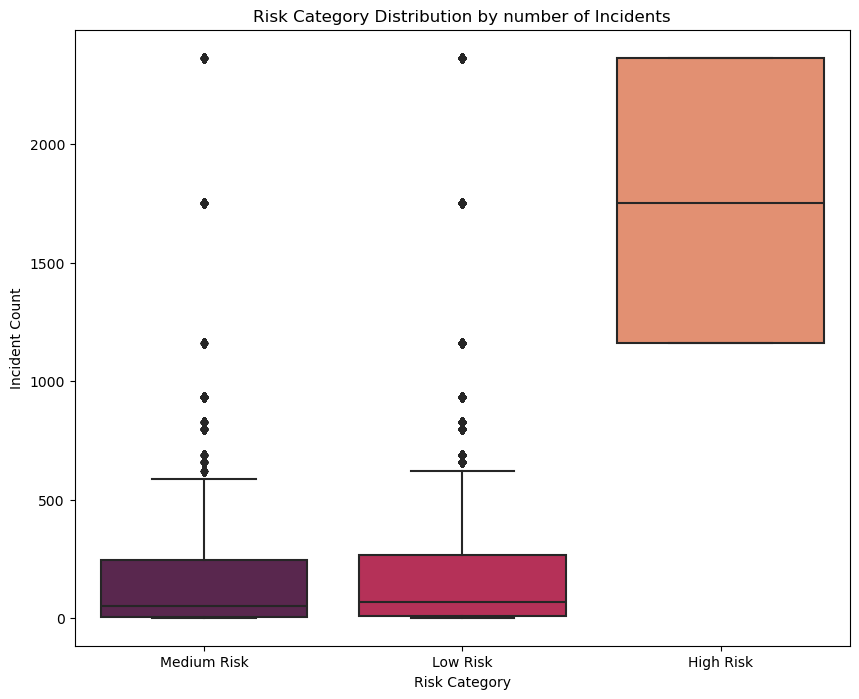

In [97]:
plt.figure(figsize = (10,8))

sns.boxplot(x = 'Risk.Category', y = 'Incident.Count', data=AD_filtered, palette='rocket')
plt.title('Risk Category Distribution by number of Incidents')
plt.xlabel ('Risk Category')
plt.ylabel('Incident Count');

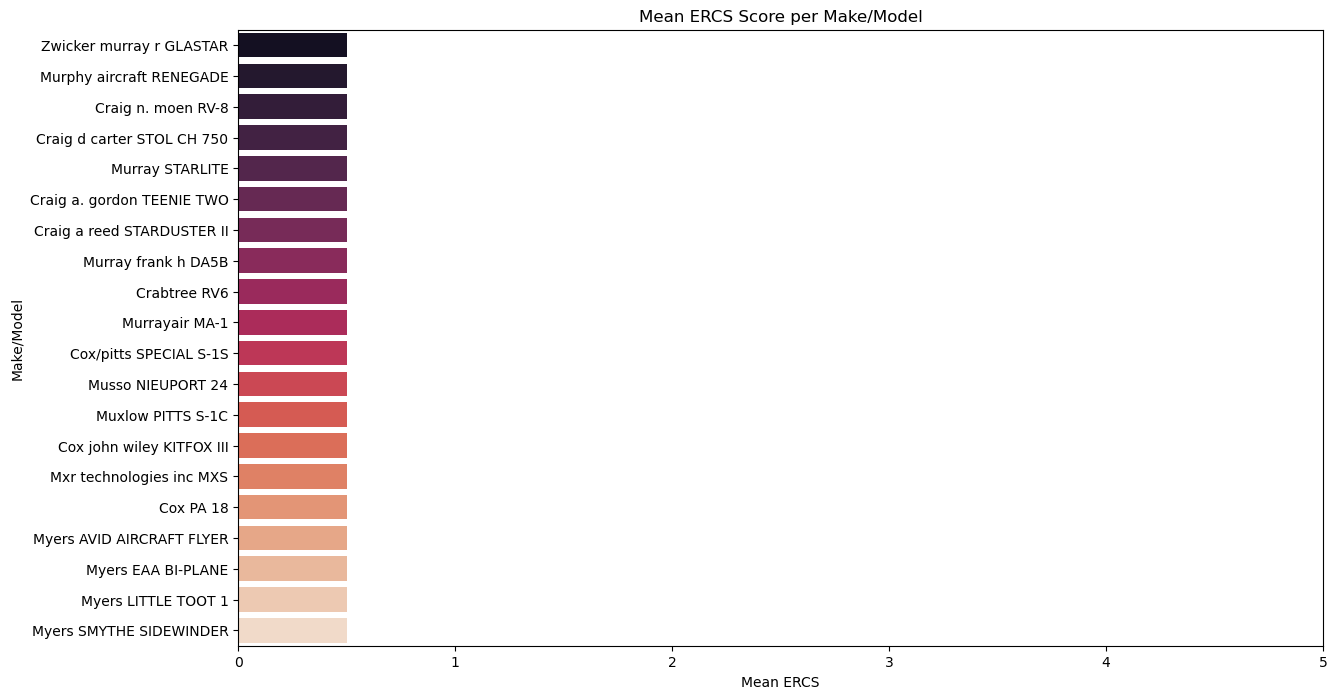

In [98]:
AD_filtered1 = AD_filtered.copy()

# Combine Make and Model columns into a single column
AD_filtered1['Make_Model'] = AD_filtered['Make'] + ' ' + AD_filtered['Model']

# Group by the combined Make/Model column and calculate the mean ERCS
make_model_ercs = AD_filtered1.groupby('Make_Model')['ERCS.Score'].mean().reset_index()

# Sort the values for better visualization
make_model_ercs = make_model_ercs.sort_values(by='ERCS.Score').head(20)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='ERCS.Score', y='Make_Model', data=make_model_ercs, palette='rocket')
plt.title('Mean ERCS Score per Make/Model')
plt.xlabel('Mean ERCS')
plt.ylabel('Make/Model')
plt.xlim(0,5)
plt.show()

# 6. Conclusions

1. The margins are too fine to narrow down ideal options from this data set.
2. Even with the inconclusive results, we have still managed to glean some ways to productively look at the data both in this dataset and beyond.

# 7. Recommendations.

1. The safety of different aircraft differ very little in most cases from this data. As such, the  ideal course of action is to consider price alongside the factors above in the acquisitions planned for.
2. This dataset does not exist in a a vacuum. The level of  maintainence, personnel involved and other factors were at play and should be considered in any decision made going forward.